<a href="https://colab.research.google.com/github/otabekqoroboyev/data-science-pandas/blob/main/Ma'lumotlar_tahlili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## Ma'lumotlar tahlili. Pandas kutubxonasi.

### 2.2.4 Statistik ma'lumotlar

In [2]:
import pandas as pd
import numpy as np
from pprint import pprint as print

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [5]:
df.shape

(13119, 9)

## `.info()` va `.describe()` Dataset haqida umumiy ma'lumot olish

In [6]:
# Df ustunlari tarkibi haqida ma'lumot
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [7]:
# DF sonli ustunlari haqida statistik ma'lumot
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


`count` - NaN qiymatga ega bo'lmagan qatorlar soni

`mean` - ko'rsatilgan ustundagi qiymatlarning o'rtacha qiymati (faqat sonli ustunlar uchun)

`std` - ustun uchun standart chetlanish

`min` - ustun uchun minimum

`25/50/75%` - qiymatlarning 25/50/75% shu oraliqda

`max` - ustun uchun maksimum

![img](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/standard-deviation-1626765925.png)

### Korrelyasiya

In [8]:
data = {
    'age':[10,20,30,40,50,60],
    'year':[2010,2000,1990,1980,1970,1960],
}

obj = pd.DataFrame(data)

In [9]:
obj['age'].corr(obj['year'])

-0.9999999999999998

<Axes: ylabel='Frequency'>

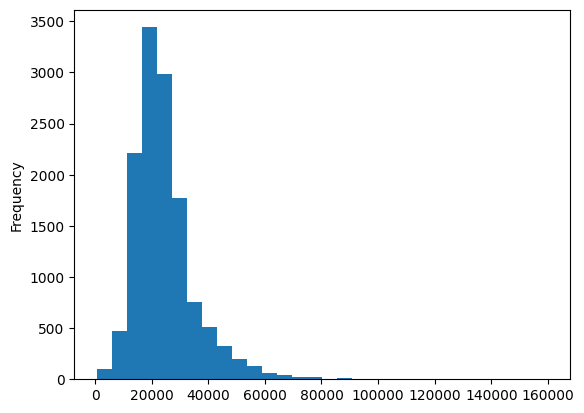

In [10]:
df['price'].plot.hist(bins=30)

In [11]:
df['year'].corr(df['mileage'])

-0.7380268515364232

In [12]:
df.corrwith(df['price'])

year          0.520712
price         1.000000
mileage      -0.537214
tax           0.268717
mpg          -0.438445
engineSize    0.516126
dtype: float64

In [13]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


## Noyob (takrorlanmas) qiymatlar

In [14]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [15]:
elements = obj.unique()
elements

array(['c', 'a', 'd', 'b'], dtype=object)

In [16]:
elements.sort()

In [17]:
elements

array(['a', 'b', 'c', 'd'], dtype=object)

In [18]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [19]:
models = df['model'].unique()
models.sort()
print(models)

array([' A Class', ' B Class', ' C Class', ' CL Class', ' CLA Class',
       ' CLC Class', ' CLK', ' CLS Class', ' E Class', ' G Class',
       ' GL Class', ' GLA Class', ' GLB Class', ' GLC Class',
       ' GLE Class', ' GLS Class', ' M Class', ' R Class', ' S Class',
       ' SL CLASS', ' SLK', ' V Class', ' X-CLASS', '180', '200', '220',
       '230'], dtype=object)


In [20]:
engine = df['engineSize'].unique()
engine.sort()
print(engine)

array([0. , 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 2. , 2.1, 2.2, 2.3, 2.5, 2.7,
       2.9, 3. , 3.2, 3.5, 3.7, 4. , 4.3, 4.7, 5. , 5.4, 5.5, 6. , 6.2])


## Qiymatlar soni

In [21]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [22]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [23]:
pd.value_counts(obj.values, sort=True)

c    3
a    3
b    2
d    1
dtype: int64

In [24]:
df['model'].value_counts()

 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
180              1
230              1
220              1
200              1
Name: model, dtype: int64

In [25]:
df['year'].value_counts()

2019    4553
2017    2381
2016    1971
2018    1467
2015     991
2020     719
2014     491
2013     292
2012      57
2011      38
2010      38
2007      22
2009      17
2008      16
2004      13
2001      10
2002       9
2005       9
2006       8
2003       7
1998       4
2000       3
1997       1
1999       1
1970       1
Name: year, dtype: int64

In [26]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [27]:
df['transmission'].value_counts()

Semi-Auto    6848
Automatic    4825
Manual       1444
Other           2
Name: transmission, dtype: int64

## Qiymatlar mavjudligini tekshirish

In [28]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [29]:
# Quyidagi ikki modelni filtrlab olish uchun mask (filtr) yaratamiz
models = [' SLK', ' M Class']
mask = df['model'].isin(models)
mask

0         True
1        False
2        False
3        False
4        False
         ...  
13114    False
13115    False
13116    False
13117    False
13118    False
Name: model, Length: 13119, dtype: bool

In [30]:
df[mask]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
40,SLK,2014,15990,Automatic,43955,Petrol,205,43.5,1.8
52,SLK,2004,4890,Automatic,46000,Petrol,330,28.0,3.5
58,SLK,2008,5980,Automatic,60000,Petrol,280,34.4,1.8
71,M Class,2008,5990,Automatic,110000,Diesel,555,28.8,3.0
...,...,...,...,...,...,...,...,...,...
12959,M Class,2009,9990,Automatic,59000,Diesel,555,30.4,3.0
12960,SLK,2012,10990,Automatic,55000,Petrol,200,43.5,1.8
13007,M Class,2012,14400,Automatic,61898,Diesel,300,39.2,3.0
13010,SLK,2015,13400,Manual,47003,Petrol,205,41.5,1.8


In [31]:
df[df.year>2017]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
10,A Class,2020,32980,Automatic,606,Petrol,145,35.8,2.0
11,A Class,2020,26980,Automatic,1000,Diesel,145,62.8,1.5
12,B Class,2019,23750,Automatic,278,Diesel,145,55.4,2.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [32]:
df[df.transmission=='Manual']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
34,A Class,2019,23184,Manual,1173,Petrol,145,44.8,1.3
56,A Class,2011,3440,Manual,74000,Diesel,150,54.3,2.0
61,E Class,2010,6980,Manual,79000,Petrol,300,35.3,1.8
63,E Class,2011,5740,Manual,115000,Diesel,160,52.3,2.1
81,SLK,2010,7495,Manual,59147,Petrol,300,36.2,1.8
...,...,...,...,...,...,...,...,...,...
13011,V Class,2013,20000,Manual,58518,Diesel,305,38.7,2.1
13014,B Class,2017,13950,Manual,5878,Diesel,20,68.9,1.5
13015,GLA Class,2017,17000,Manual,26000,Petrol,145,48.7,1.6
13024,A Class,2016,16500,Manual,16984,Diesel,30,62.8,2.1
